In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler

In [108]:
df = pd.read_csv('/chatriotgames101821Average1Second.csv')

In [109]:
df

,Date,comp_score
0,2021-10-18 17:18:04,0.652300
1,2021-10-18 17:18:05,NaN
2,2021-10-18 17:18:06,NaN
3,2021-10-18 17:18:07,NaN
4,2021-10-18 17:18:08,NaN
...,...,...
3443,2021-10-18 18:15:27,-0.228467
3444,2021-10-18 18:15:28,0.228950
3445,2021-10-18 18:15:29,0.401900
3446,2021-10-18 18:15:30,-0.584900


In [110]:
df = df[3387:3447]

In [111]:
df

,Date,comp_score
3387,2021-10-18 18:14:31,-0.076800
3388,2021-10-18 18:14:32,-0.612400
3389,2021-10-18 18:14:33,-0.459300
3390,2021-10-18 18:14:34,-0.431783
3391,2021-10-18 18:14:35,-0.294960
3392,2021-10-18 18:14:36,-0.332000
3393,2021-10-18 18:14:37,-0.185800
3394,2021-10-18 18:14:38,-0.054200
3395,2021-10-18 18:14:39,-0.153100
3396,2021-10-18 18:14:40,-0.253325


In [112]:
df.fillna(0, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [113]:
df

,Date,comp_score
3387,2021-10-18 18:14:31,-0.076800
3388,2021-10-18 18:14:32,-0.612400
3389,2021-10-18 18:14:33,-0.459300
3390,2021-10-18 18:14:34,-0.431783
3391,2021-10-18 18:14:35,-0.294960
3392,2021-10-18 18:14:36,-0.332000
3393,2021-10-18 18:14:37,-0.185800
3394,2021-10-18 18:14:38,-0.054200
3395,2021-10-18 18:14:39,-0.153100
3396,2021-10-18 18:14:40,-0.253325


In [114]:
df = df.iloc[:,1:2].values

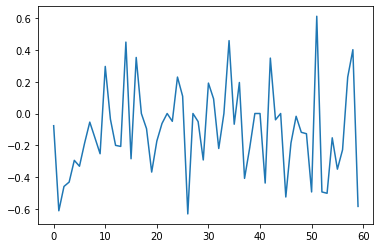

In [115]:
#plt.plot(training_set, label = 'Shampoo Sales Data')
plt.plot(df, label = 'comp_score')
plt.show()

In [116]:
def sliding_windows(data, seq_length):
    x = []
    y = []

    for i in range(len(data)-seq_length-1):
        _x = data[i:(i+seq_length)]
        _y = data[i+seq_length]
        x.append(_x)
        y.append(_y)

    return np.array(x),np.array(y)

sc = MinMaxScaler()
training_data = sc.fit_transform(df)

seq_length = 4
x, y = sliding_windows(training_data, seq_length)

train_size = int(len(y) * 0.6)
test_size = len(y) - train_size

dataX = Variable(torch.Tensor(np.array(x)))
dataY = Variable(torch.Tensor(np.array(y)))

trainX = Variable(torch.Tensor(np.array(x[0:train_size])))
trainY = Variable(torch.Tensor(np.array(y[0:train_size])))

testX = Variable(torch.Tensor(np.array(x[train_size:len(x)])))
testY = Variable(torch.Tensor(np.array(y[train_size:len(y)])))

In [117]:
class LSTM(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()
        
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length
        
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)
        
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        c_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        # Propagate input through LSTM
        ula, (h_out, _) = self.lstm(x, (h_0, c_0))
        
        h_out = h_out.view(-1, self.hidden_size)
        
        out = self.fc(h_out)
        
        return out

In [118]:
num_epochs = 2000
learning_rate = 0.01

input_size = 1
hidden_size = 2
num_layers = 1

num_classes = 1

lstm = LSTM(num_classes, input_size, hidden_size, num_layers)

criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)
#optimizer = torch.optim.SGD(lstm.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    outputs = lstm(trainX)
    optimizer.zero_grad()
    
    # obtain the loss function
    loss = criterion(outputs, trainY)
    
    loss.backward()
    
    optimizer.step()
    if epoch % 100 == 0:
      print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

Epoch: 0, loss: 0.03836
Epoch: 100, loss: 0.03594
Epoch: 200, loss: 0.03098
Epoch: 300, loss: 0.02922
Epoch: 400, loss: 0.02592
Epoch: 500, loss: 0.02072
Epoch: 600, loss: 0.01556
Epoch: 700, loss: 0.01302
Epoch: 800, loss: 0.01225
Epoch: 900, loss: 0.01169
Epoch: 1000, loss: 0.01107
Epoch: 1100, loss: 0.01004
Epoch: 1200, loss: 0.00915
Epoch: 1300, loss: 0.00819
Epoch: 1400, loss: 0.00719
Epoch: 1500, loss: 0.00620
Epoch: 1600, loss: 0.00543
Epoch: 1700, loss: 0.00501
Epoch: 1800, loss: 0.00478
Epoch: 1900, loss: 0.00462


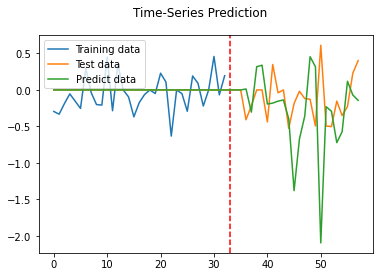

In [119]:
lstm.eval()
train_predict = lstm(testX)

data_predict = train_predict.data.numpy()
dataY_plot = testY.data.numpy()
dataY_training_plot = trainY.data.numpy()

data_predict = sc.inverse_transform(data_predict)
dataY_plot = sc.inverse_transform(dataY_plot)
dataY_training_plot = sc.inverse_transform(dataY_training_plot)

plt.axvline(x=train_size, c='r', linestyle='--')

plt.plot(dataY_training_plot,label='Training data')
plt.plot(np.append(np.zeros(int(len(y) * 0.67)),dataY_plot),label='Test data')
plt.plot(np.append(np.zeros(int(len(y) * 0.67)),data_predict),label='Predict data')
plt.legend(loc="upper left")
plt.suptitle('Time-Series Prediction')
plt.show()

In [121]:
##dftest = pd.date_range('2021-10-1 18:15:30 ', '2021-10-1 18:20:20', freq='10s')
dftest = pd.date_range('2021-10-18 18:15:30 ', '2021-10-18 18:15:45', freq='1s')
dftest

DatetimeIndex(['2021-10-18 18:15:30', '2021-10-18 18:15:31',
               '2021-10-18 18:15:32', '2021-10-18 18:15:33',
               '2021-10-18 18:15:34', '2021-10-18 18:15:35',
               '2021-10-18 18:15:36', '2021-10-18 18:15:37',
               '2021-10-18 18:15:38', '2021-10-18 18:15:39',
               '2021-10-18 18:15:40', '2021-10-18 18:15:41',
               '2021-10-18 18:15:42', '2021-10-18 18:15:43',
               '2021-10-18 18:15:44', '2021-10-18 18:15:45'],
              dtype='datetime64[ns]', freq='S')

In [125]:
size = int(len(y)) - int(len(y)* 0.67)
forecast_df = pd.DataFrame(data_predict[size-17:size-1], index=dftest, columns=['Forecast'])
forecast_df["Forecast"]

2021-10-18 18:15:30    0.318006
2021-10-18 18:15:31    0.339081
2021-10-18 18:15:32   -0.193366
2021-10-18 18:15:33   -0.180251
2021-10-18 18:15:34   -0.153563
2021-10-18 18:15:35   -0.136831
2021-10-18 18:15:36   -0.395875
2021-10-18 18:15:37   -1.379790
2021-10-18 18:15:38   -0.672622
2021-10-18 18:15:39   -0.357367
2021-10-18 18:15:40    0.455434
2021-10-18 18:15:41    0.317298
2021-10-18 18:15:42   -2.095762
2021-10-18 18:15:43   -0.229525
2021-10-18 18:15:44   -0.292085
2021-10-18 18:15:45   -0.722177
Freq: S, Name: Forecast, dtype: float32

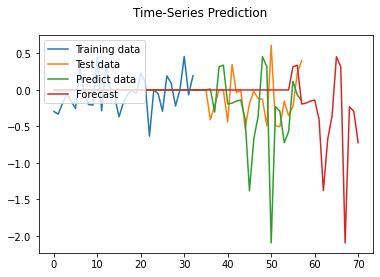

In [126]:
plt.plot(dataY_training_plot,label='Training data')
plt.plot(np.append(np.zeros(int(len(y) * 0.67)),dataY_plot),label='Test data')
plt.plot(np.append(np.zeros(int(len(y) * 0.67)),data_predict),label='Predict data')
plt.plot(np.append(np.zeros(int(len(y))),forecast_df["Forecast"]),label='Forecast')
plt.legend(loc="upper left")
plt.suptitle('Time-Series Prediction')
plt.show()